In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('marriage.csv')

# EDA

In [8]:
df.head(1)

,Unnamed: 0,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,50,Self-emp-not-inc,Bachelors,13,1,Exec-managerial,White,Male,0,0,13,United-States,<=85k


In [6]:
# Continuous vs. Discrete independent variables
columns_cont = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']
columns_dis = ['workclass', 'education_num', 'occupation',
               'race', 'sex', 'native_country']

In [7]:
# Print value_counts for all discrete independent variables 
for col in columns_dis:
    print(col + ':\n')
    print(df[str(col)].value_counts())
    print('\n')
    print('Total: ', df[str(col)].value_counts().sum())
    print('\n')

workclass:

Private             13638
Self-emp-not-inc     2006
Local-gov            1457
Self-emp-inc          919
State-gov             842
Federal-gov           663
Without-pay             9
Name: workclass, dtype: int64


Total:  19534


education_num:

9     6574
10    3972
13    3240
8     2183
14    1204
11     934
12     678
15     448
16     301
Name: education_num, dtype: int64


Total:  19534


occupation:

Craft-repair         3119
Exec-managerial      3108
Prof-specialty       2730
Sales                2176
Adm-clerical         1984
Other-service        1421
Machine-op-inspct    1349
Transport-moving     1214
Farming-fishing       681
Handlers-cleaners     643
Tech-support          569
Protective-serv       479
Priv-house-serv        58
Armed-Forces            3
Name: occupation, dtype: int64


Total:  19534


race:

White                 17185
Black                  1512
Asian-Pac-Islander      515
Amer-Indian-Eskimo      180
Other                   142
Name: race, dtype:

# Visualizations

### Target Variable

Target Variable
marital_status
0     5512
1    14022
Name: marital_status, dtype: int64


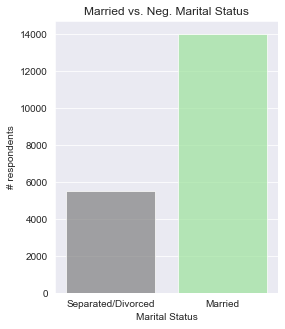

In [5]:
# Favorable Marriage Count
print('Target Variable')
print(df.groupby(['marital_status']).marital_status.count())

# Target Variable Countplot
sns.set_style('darkgrid')
fig_target = plt.figure(figsize = (4,5))
sns.countplot(df['marital_status'], alpha =.70, palette= ['grey','lightgreen'])
plt.title('Married vs. Neg. Marital Status')
plt.ylabel('# respondents')
plt.xlabel('Marital Status')
plt.xticks(ticks=[0,1], labels=['Separated/Divorced', 'Married'])
plt.show()

## Null Accuracy

In [6]:
# To classify dependent variable
neg_marital_status = ['Divorced', 'Separated', 'Married-spouse-absent']

# Positive marriage outcome
married = df.marital_status == 1
not_married = df.marital_status == 0

In [7]:
# Null accuracy
null_acc = len(df[not_married])/len(df)

# Assuming every marriage will end in divorce/separation using this data
# National Average: between 42-45%
print('{:0.3f}'.format(null_acc))

0.282


### Discrete Variables

In [8]:
# Identify categorical features
print('Discrete Variables\n\n')
print(df.groupby('workclass').workclass.count(), '\n')
print(df.groupby('education_num').education_num.count(), '\n')
print(df.groupby('occupation').occupation.count(), '\n')
print(df.groupby('race').race.count(), '\n')
print(df.groupby('sex').sex.count(), '\n')
print(df.groupby('native_country').native_country.count(), '\n')

Discrete Variables


workclass
Federal-gov           663
Local-gov            1457
Private             13638
Self-emp-inc          919
Self-emp-not-inc     2006
State-gov             842
Without-pay             9
Name: workclass, dtype: int64 

education_num
8     2183
9     6574
10    3972
11     934
12     678
13    3240
14    1204
15     448
16     301
Name: education_num, dtype: int64 

occupation
Adm-clerical         1984
Armed-Forces            3
Craft-repair         3119
Exec-managerial      3108
Farming-fishing       681
Handlers-cleaners     643
Machine-op-inspct    1349
Other-service        1421
Priv-house-serv        58
Prof-specialty       2730
Protective-serv       479
Sales                2176
Tech-support          569
Transport-moving     1214
Name: occupation, dtype: int64 

race
Amer-Indian-Eskimo      180
Asian-Pac-Islander      515
Black                  1512
Other                   142
White                 17185
Name: race, dtype: int64 

sex
Female     4754
Male  

### Frequency Distributions (discrete variables)

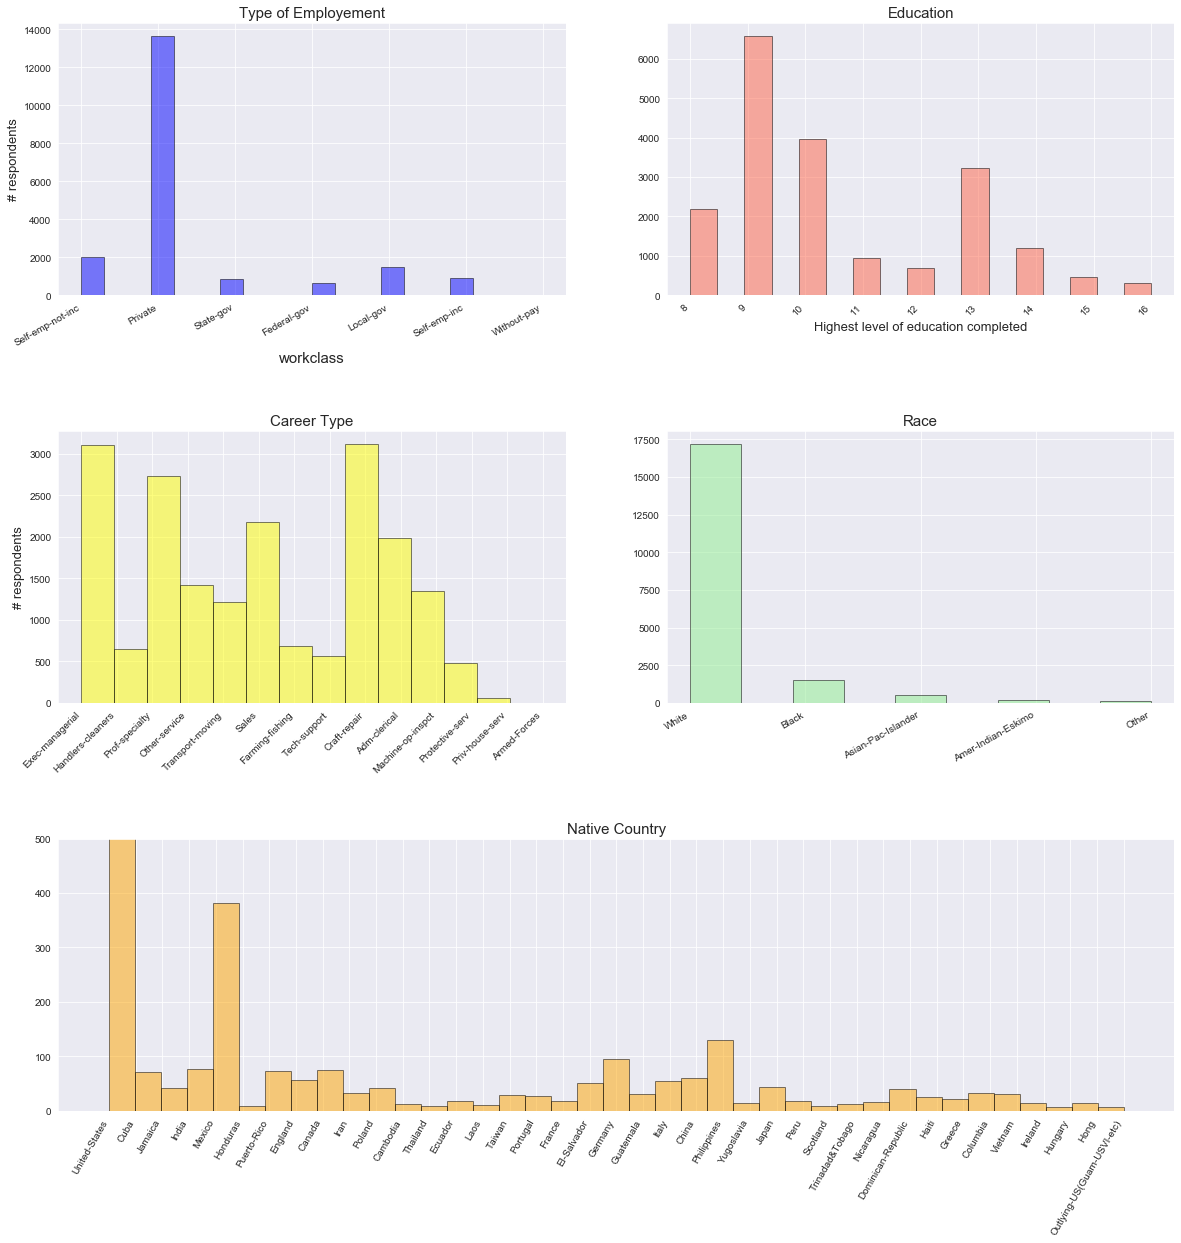

In [9]:
sns.set_style('darkgrid')
fig_discrete = plt.figure(figsize=(20,20))
fig_discrete.subplots_adjust(hspace=.50)

ax1 = fig_discrete.add_subplot(321)
ax1.hist(df.workclass, bins=20, alpha=.5, edgecolor='black', color='blue')
ax1.set_xlabel('workclass', fontsize = 15)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=30, horizontalalignment='right')
ax1.set_ylabel('# respondents', fontsize = 13)
ax1.set_title('Type of Employement', fontsize = 15)

ax2 = fig_discrete.add_subplot(322)
ax2.hist(df.education_num, bins=17, alpha=.5, edgecolor='black', color='tomato')
ax2.set_xlabel('Highest level of education completed', fontsize = 13)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, horizontalalignment='right')
# ax2.set_xticklabels(educ_order)
# plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='center')
ax2.set_title('Education', fontsize = 15)

ax3 = fig_discrete.add_subplot(323)
ax3.hist(df.occupation, bins=14, alpha=.5, edgecolor='black', color='yellow')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, horizontalalignment='right')
ax3.set_ylabel('# respondents',fontsize = 13)
ax3.set_title('Career Type', fontsize = 15)

ax4 = fig_discrete.add_subplot(324)
ax4.hist(df.race, bins=9, alpha=.5, edgecolor='black', color='lightgreen')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=30, horizontalalignment='right')
ax4.set_title('Race', fontsize = 15)

# ax5 = fig_discrete.add_subplot(325)
# ax5.hist(df.sex, bins=4, alpha=.5, edgecolor='black', color='blue')
# ax5.set_ylabel('# respondents',fontsize = 13)
# ax5.set_title('Sex', fontsize = 15)

ax6 = fig_discrete.add_subplot(313)
ax6.hist(df.native_country, bins=39, alpha=.5, edgecolor='black', color='orange')
plt.setp(ax6.xaxis.get_majorticklabels(), rotation=60, horizontalalignment='right')
ax6.set_title('Native Country', fontsize = 15)
ax6.set_ylim(top=500)

plt.show();

# Stacked bar plots to show breakdown per feature

## Discrete Variables

### Education

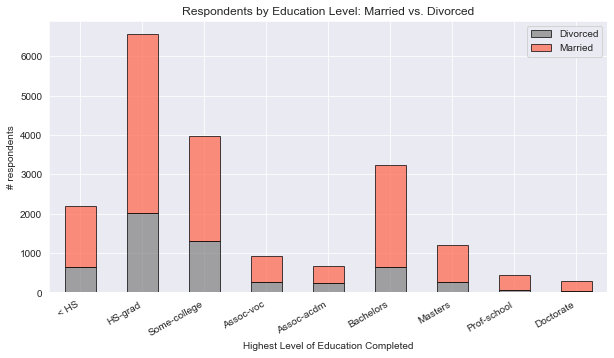

In [10]:
# Changed the order of the x-axis to match the earlier visualizations
educ_order = ['< HS', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 
              'Bachelors', 'Masters', 'Prof-school', 'Doctorate']

educ_married = df.groupby(['education_num','marital_status']).education_num.count().unstack()
e1 = educ_married.plot(kind = 'bar', stacked = True, figsize=(10,5),
                   title = 'Respondents by Education Level: Married vs. Divorced', 
                   color = ['grey','tomato'], edgecolor='black', alpha = .70)

e1.set_xlabel('Highest Level of Education Completed')
e1.set_xticklabels(educ_order, rotation=30, ha='right')
e1.set_ylabel('# respondents')
e1.legend(['Divorced','Married'])
plt.show()

In [11]:
educ_counts = pd.DataFrame(df.education_num.value_counts())
educ_splits = pd.DataFrame(educ_married)
educ_counts_df = educ_counts.merge(educ_splits, left_index=True, right_on='education_num')
educ_counts_df['total'] = educ_counts_df.education_num

In [12]:
educ_counts_df.drop('education_num', axis=1, inplace=True)

In [13]:
educ_counts_df['divorce_rate'] = educ_counts_df.loc[:,0]/educ_counts_df.loc[:,'total']

In [14]:
# educ_counts_df

FREAKONOMICS stat from 'How to Live Longer' (Jan 09, 2012)

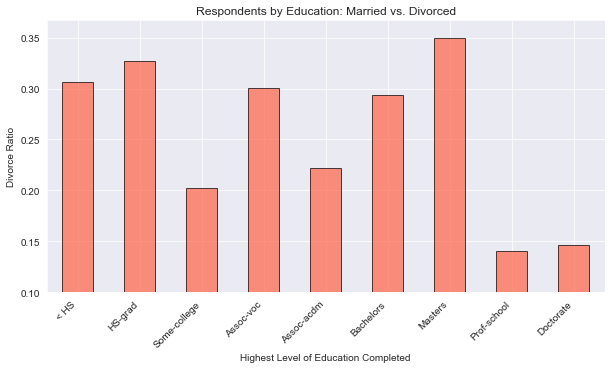

In [15]:
e2 = educ_counts_df['divorce_rate'].plot(kind = 'bar', figsize=(10,5),
                   title = 'Respondents by Education: Married vs. Divorced', 
                   color = ['tomato'], edgecolor='black', alpha = .70)

e2.set_xlabel('Highest Level of Education Completed')
e2.set_xticklabels(educ_order, rotation=45, ha='right')
e2.set_ylabel('Divorce Ratio')
e2.set_ylim(bottom=.1)
plt.show()

### Race

In [16]:
print('Race Class Summary\n')
race_summary = df.groupby(['race', 'marital_status']).race.count().unstack()
print(race_summary)

Race Class Summary

marital_status         0      1
race                           
Amer-Indian-Eskimo    72    108
Asian-Pac-Islander   109    406
Black                746    766
Other                 50     92
White               4535  12650


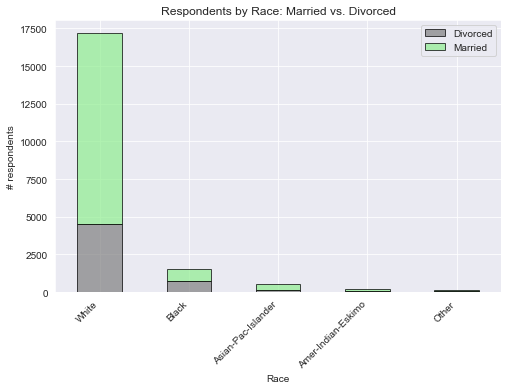

In [17]:
# Changed the order of the x-axis to match the earlier visualizations
race_order = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

race_married = df.groupby(['race','marital_status']).race.count().unstack()
r1 = race_married.loc[race_order].plot(kind = 'bar', stacked = True, figsize=(8,5),
                   title = 'Respondents by Race: Married vs. Divorced', 
                   color = ['grey','lightgreen'], edgecolor='black', alpha = .70)

r1.set_xlabel('Race')
r1.set_xticklabels(race_order, rotation=45, ha='right')
r1.set_ylabel('# respondents')
r1.legend(['Divorced','Married'])
plt.show()

In [18]:
# Create a new df with divorce rate by race
race_counts = pd.DataFrame(df.race.value_counts())
race_splits = pd.DataFrame(race_summary)
race_counts_df = race_counts.merge(race_splits, left_index=True, right_on='race')

In [19]:
# Change name of column
race_counts_df['total'] = race_counts_df.race 

# then drop old column
race_counts_df.drop('race', inplace=True, axis=1)

In [20]:
# Add divorce rate column
race_counts_df['divorce_rate'] = race_counts_df.loc[:,0]/race_counts_df.loc[:,'total']

In [21]:
race_counts_df

,0,1,total,divorce_rate
race,,,,
White,4535,12650,17185,0.263893
Black,746,766,1512,0.493386
Asian-Pac-Islander,109,406,515,0.211650
Amer-Indian-Eskimo,72,108,180,0.400000
Other,50,92,142,0.352113


In [22]:
race_counts = pd.DataFrame(df.race.value_counts())
race_splits = pd.DataFrame(race_married)
race_counts_df = race_counts.merge(race_splits, left_index=True, right_on='race')
race_counts_df['total'] = race_counts_df.race

In [23]:
race_counts_df

,race,0,1,total
race,,,,
White,17185,4535,12650,17185
Black,1512,746,766,1512
Asian-Pac-Islander,515,109,406,515
Amer-Indian-Eskimo,180,72,108,180
Other,142,50,92,142


In [24]:
race_counts_df['divorce_rate'] = race_counts_df.loc[:,0]/race_counts_df.loc[:,'total']

In [25]:
# Changed the order of the x-axis to match the earlier visualizations
race_order = df.race.unique()

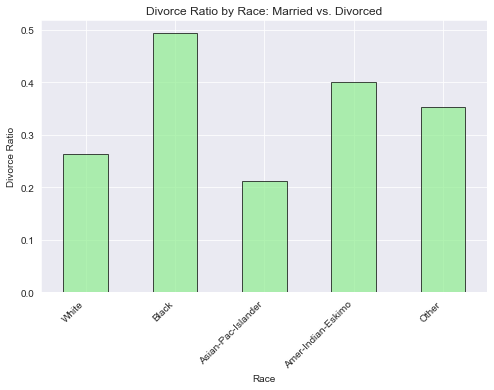

In [26]:
r2 = race_counts_df['divorce_rate'].plot(kind = 'bar', figsize=(8,5),
                   title = 'Divorce Ratio by Race: Married vs. Divorced', 
                   color = ['lightgreen'], edgecolor='black', alpha = .70)

r2.set_xlabel('Race')
r2.set_xticklabels(race_order, rotation=45, ha='right')
r2.set_ylabel('Divorce Ratio')
plt.show()

### Native Country

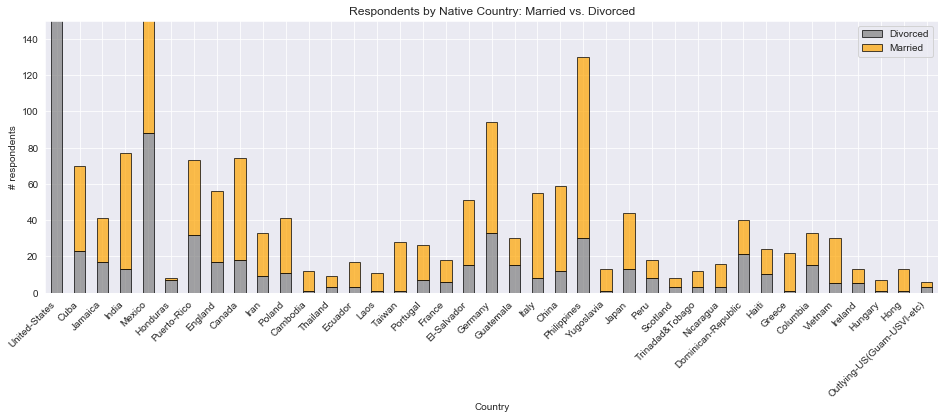

In [27]:
# Changed the order of the x-axis to match the earlier visualizations
country_order = df.native_country.unique()

country_married = df.groupby(['native_country','marital_status']).native_country.count().unstack()
c1 = country_married.loc[country_order].plot(kind = 'bar', stacked = True, figsize=(16,5),
                   title = 'Respondents by Native Country: Married vs. Divorced', 
                   color = ['grey','orange'], edgecolor='black', alpha = .70)

c1.set_xlabel('Country')
c1.set_xticklabels(country_order, rotation=45, ha='right')
c1.set_ylabel('# respondents')
c1.set_ylim(top=150)
c1.legend(['Divorced','Married'])
plt.show()

In [28]:
country_counts = pd.DataFrame(df.native_country.value_counts())
country_splits = pd.DataFrame(country_married)
country_counts_df = country_counts.merge(country_splits, left_index=True, right_on='native_country')
country_counts_df['total'] = country_counts_df.native_country

In [29]:
country_counts_df['divorce_rate'] = country_counts_df.loc[:,0]/country_counts_df.loc[:,'total']

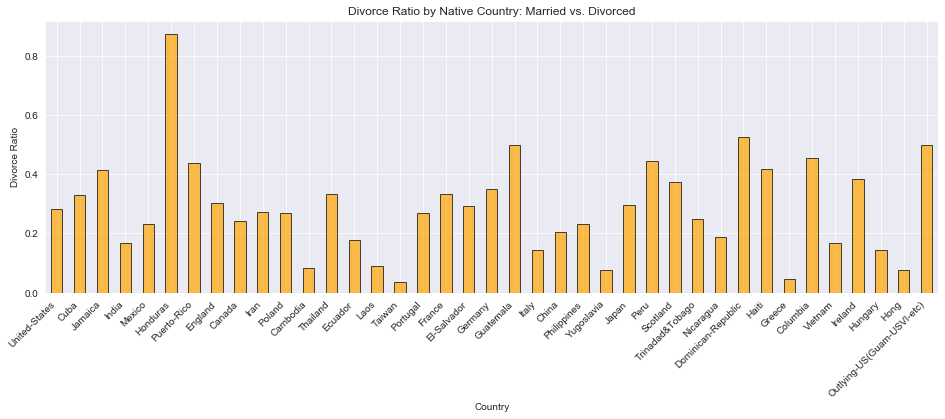

In [30]:
# Changed the order of the x-axis to match the earlier visualizations
country_order = df.native_country.unique()

c2 = country_counts_df['divorce_rate'].loc[country_order].plot(kind = 'bar', figsize=(16,5),
                   title = 'Divorce Ratio by Native Country: Married vs. Divorced', 
                   color = ['orange'], edgecolor='black', alpha = .70)

c2.set_xlabel('Country')
c2.set_xticklabels(country_order, rotation=45, ha='right')
c2.set_ylabel('Divorce Ratio')
plt.show()

Huge spikes in divorce rates likely due to small sample size (Honduras: n=8). 

Consider:
- grouping geographic regions together
- grouping prominant religions together

In [31]:
country_counts_df.drop('native_country', axis=1, inplace=True)

In [32]:
# Above average rates of divorce
country_counts_df[country_counts_df.divorce_rate >= null_acc].sort_values('divorce_rate')

,0,1,total,divorce_rate
native_country,,,,
United-States,5049,12792,17841,0.283000
El-Salvador,15,36,51,0.294118
Japan,13,31,44,0.295455
England,17,39,56,0.303571
Cuba,23,47,70,0.328571
Thailand,3,6,9,0.333333
France,6,12,18,0.333333
Germany,33,61,94,0.351064
Scotland,3,5,8,0.375000


In [33]:
country_counts_df[country_counts_df.divorce_rate >= null_acc].sort_values('divorce_rate')

,0,1,total,divorce_rate
native_country,,,,
United-States,5049,12792,17841,0.283000
El-Salvador,15,36,51,0.294118
Japan,13,31,44,0.295455
England,17,39,56,0.303571
Cuba,23,47,70,0.328571
Thailand,3,6,9,0.333333
France,6,12,18,0.333333
Germany,33,61,94,0.351064
Scotland,3,5,8,0.375000


In [34]:
# Respondents from El Salvador, England, Cuba, Germany, Puerto-Rico 
# all have above average rate of divorce with more than 50 respondents
country_counts_df[country_counts_df.total > 50].sort_values('divorce_rate')

,0,1,total,divorce_rate
native_country,,,,
Italy,8,47,55,0.145455
India,13,64,77,0.168831
China,12,47,59,0.203390
Philippines,30,100,130,0.230769
Mexico,88,293,381,0.230971
Canada,18,56,74,0.243243
United-States,5049,12792,17841,0.283000
El-Salvador,15,36,51,0.294118
England,17,39,56,0.303571


#### Group geographic/cultural neighbors together

In [35]:
latin_american = ['Cuba', 'Mexico', 'Honduras', 'Puerto-Rico', 'Ecuador',
                  'El-Salvador', 'Guatemala', 'Peru', 'Nicaragua',
                  'Dominican-Republic', 'Haiti', 'Columbia']
se_asia = ['Vietnam', 'Taiwan', 'Hong', 'Cambodia', 'Laos', 'Thailand', 'Philippines']

In [36]:
df5 = df.replace(latin_american, 'Latin-America')
df6 = df5.replace(se_asia, 'SE-Asia')
df6.head()

,Unnamed: 0,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,50,Self-emp-not-inc,Bachelors,13,1,Exec-managerial,White,Male,0,0,13,United-States,<=85k
1,2,38,Private,HS-grad,9,0,Handlers-cleaners,White,Male,0,0,40,United-States,<=85k
2,3,53,Private,<HS,8,1,Handlers-cleaners,Black,Male,0,0,40,United-States,<=85k
3,4,28,Private,Bachelors,13,1,Prof-specialty,Black,Female,0,0,40,Latin-America,<=85k
4,5,37,Private,Masters,14,1,Exec-managerial,White,Female,0,0,40,United-States,<=85k


In [37]:
country_married2 = df6.groupby(['native_country','marital_status']).native_country.count().unstack()
country_counts2 = pd.DataFrame(df6.native_country.value_counts())
country_splits2 = pd.DataFrame(country_married2)
country_counts_df2 = country_counts2.merge(country_splits2, left_index=True, right_on='native_country')

In [38]:
country_counts_df2['total'] = country_counts_df2.native_country

In [39]:
country_counts_df2.drop('native_country', axis=1, inplace=True)

In [40]:
country_counts_df2['divorce_rate'] = country_counts_df2.loc[:,0]/country_counts_df2.loc[:,'total']

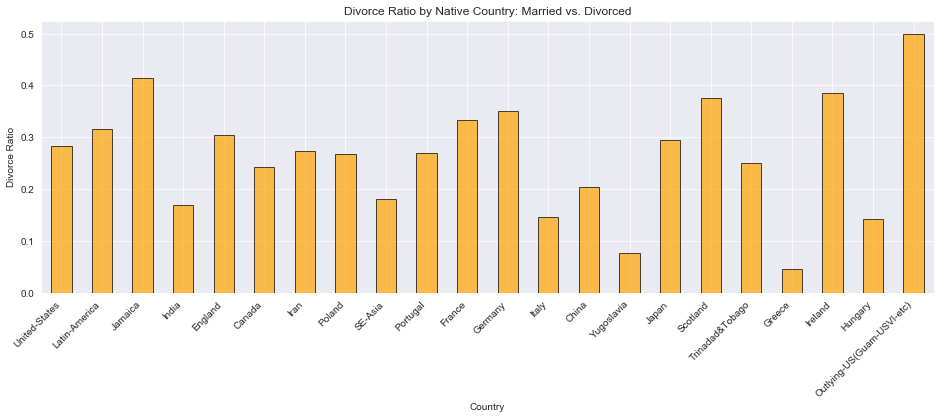

In [41]:
# Changed the order of the x-axis to match the earlier visualizations
country_order2 = df6.native_country.unique()

c3 = country_counts_df2['divorce_rate'].loc[country_order2].plot(kind = 'bar', figsize=(16,5),
                   title = 'Divorce Ratio by Native Country: Married vs. Divorced', 
                   color = ['orange'], edgecolor='black', alpha = .70)

c3.set_xlabel('Country')
c3.set_xticklabels(country_order2, rotation=45, ha='right')
c3.set_ylabel('Divorce Ratio')
plt.show()

### Occupation Type

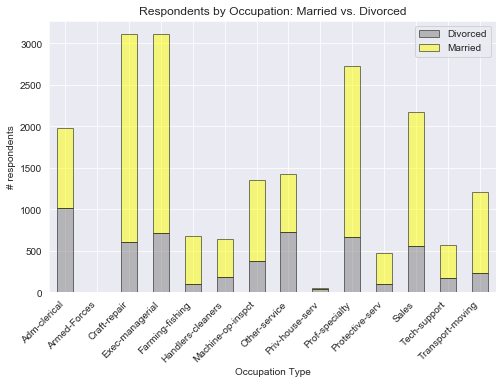

In [42]:
occupation_married = df6.groupby(['occupation','marital_status']).occupation.count().unstack()
o1 = occupation_married.plot(kind = 'bar', stacked = True, figsize=(8,5),
                   title = 'Respondents by Occupation: Married vs. Divorced', 
                   color = ['grey','yellow'], edgecolor='black', alpha = .50)

o1.set_xlabel('Occupation Type')
o1.set_xticklabels(labels=occupation_married.index, rotation=45, ha='right')
o1.set_ylabel('# respondents')
o1.legend(['Divorced','Married'])
plt.show()

#### Maybe some higher rates of divorce among "admin assistants" and "private house service" employees

In [43]:
occu_counts = pd.DataFrame(df6.occupation.value_counts())
occu_splits = pd.DataFrame(occupation_married)
occu_counts_df = occu_counts.merge(occu_splits, left_index=True, right_on='occupation')
occu_counts_df['total'] = occu_counts_df.occupation

In [44]:
occu_counts_df['divorce_rate'] = occu_counts_df.loc[:,0]/occu_counts_df.loc[:,'total']

In [45]:
occu_counts_df.drop('occupation', axis=1, inplace=True)

In [46]:
occu_counts_df

,0,1,total,divorce_rate
occupation,,,,
Craft-repair,604.0,2515.0,3119,0.193652
Exec-managerial,721.0,2387.0,3108,0.231982
Prof-specialty,672.0,2058.0,2730,0.246154
Sales,554.0,1622.0,2176,0.254596
Adm-clerical,1015.0,969.0,1984,0.511593
Other-service,727.0,694.0,1421,0.511612
Machine-op-inspct,382.0,967.0,1349,0.283173
Transport-moving,232.0,982.0,1214,0.191104
Farming-fishing,106.0,575.0,681,0.155653


In [47]:
occupation_married.index

Index(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving'],
      dtype='object', name='occupation')

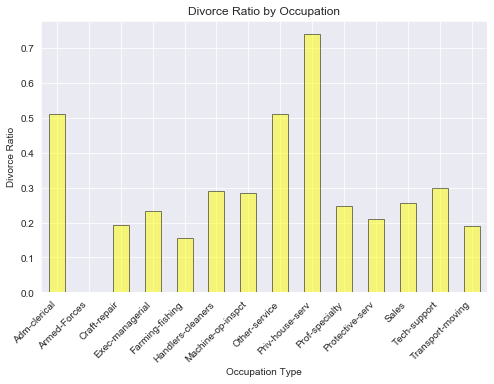

In [48]:
# Changed the order of the x-axis to match the earlier visualizations
occu_order = occupation_married.index

o3 = occu_counts_df['divorce_rate'].loc[occu_order].plot(kind = 'bar', figsize=(8,5),
                   title = 'Divorce Ratio by Occupation', 
                   color = ['yellow'], edgecolor='black', alpha = .50)

o3.set_xlabel('Occupation Type')
o3.set_xticklabels(occu_order, rotation=45, ha='right')
o3.set_ylabel('Divorce Ratio')
plt.show()

#### Split into blue vs. white collar occupations

In [49]:
blue_collar = ['Craft-repair', 'Other-service', 'Machine-op-inspct',
               'Transport-moving', 'Farming-fishing', 'Handlers-cleaners',
               'Protective-serv', 'Priv-house-serv', 'Armed-Forces']
white_collar = ['Exec-managerial', 'Prof-specialty', 'Sales', 'Adm-clerical', 'Tech-support']

In [50]:
df7 = df6.replace(blue_collar, 'Blue')
df8 = df7.replace(white_collar, 'White')

In [51]:
df8.head()

,Unnamed: 0,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,50,Self-emp-not-inc,Bachelors,13,1,White,White,Male,0,0,13,United-States,<=85k
1,2,38,Private,HS-grad,9,0,Blue,White,Male,0,0,40,United-States,<=85k
2,3,53,Private,<HS,8,1,Blue,Black,Male,0,0,40,United-States,<=85k
3,4,28,Private,Bachelors,13,1,White,Black,Female,0,0,40,Latin-America,<=85k
4,5,37,Private,Masters,14,1,White,White,Female,0,0,40,United-States,<=85k


In [52]:
df8.occupation.value_counts()

White    10567
Blue      8967
Name: occupation, dtype: int64

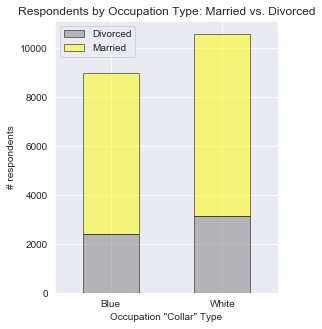

In [53]:
occupation_married2 = df8.groupby(['occupation','marital_status']).occupation.count().unstack()
o2 = occupation_married2.plot(kind = 'bar', stacked = True, figsize=(4,5),
                   title = 'Respondents by Occupation Type: Married vs. Divorced', 
                   color = ['grey','yellow'], edgecolor='black', alpha = .50)

o2.set_xlabel('Occupation "Collar" Type')
o2.set_xticklabels(['Blue', 'White'], rotation=0)
o2.set_ylabel('# respondents')
o2.legend(['Divorced','Married'])
plt.show()

In [54]:
occu_counts2 = pd.DataFrame(df8.occupation.value_counts())
occu_splits2 = pd.DataFrame(occupation_married2)
occu_counts_df2 = occu_counts2.merge(occu_splits2, left_index=True, right_on='occupation')
occu_counts_df2['total'] = occu_counts_df2.occupation

In [55]:
occu_counts_df2['divorce_rate'] = occu_counts_df2.loc[:,0]/occu_counts_df2.loc[:,'total']

In [56]:
occu_counts_df2.drop('occupation', axis=1, inplace=True)

In [57]:
occu_counts_df2

,0,1,total,divorce_rate
occupation,,,,
White,3132,7435,10567,0.296394
Blue,2380,6587,8967,0.265418


### Gender

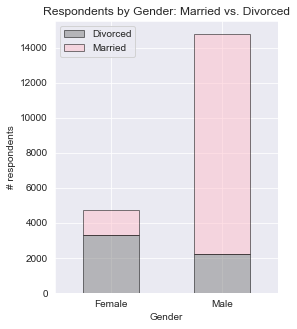

In [58]:
gender_married = df8.groupby(['sex','marital_status']).sex.count().unstack()
g1 = gender_married.plot(kind = 'bar', stacked = True, figsize=(4,5),
                   title = 'Respondents by Gender: Married vs. Divorced', 
                   color = ['grey','pink'], edgecolor='black', alpha = .50)

g1.set_xlabel('Gender')
g1.set_xticklabels(['Female', 'Male'], rotation=0)
g1.set_ylabel('# respondents')
g1.legend(['Divorced','Married'])
plt.show()

In [59]:
gender_counts = pd.DataFrame(df8.sex.value_counts())
gender_splits = pd.DataFrame(gender_married)
gender_counts_df = gender_counts.merge(gender_splits, left_index=True, right_on='sex')
gender_counts_df['total'] = gender_counts_df.sex

In [60]:
gender_counts_df['divorce_rate'] = gender_counts_df.loc[:,0]/gender_counts_df.loc[:,'total']

In [61]:
gender_counts_df.drop('sex', axis=1, inplace=True)

In [62]:
gender_counts_df

,0,1,total,divorce_rate
sex,,,,
Male,2230,12550,14780,0.150880
Female,3282,1472,4754,0.690366


## Continuous Variables

### Age and Hours worked per week (continuous variables)

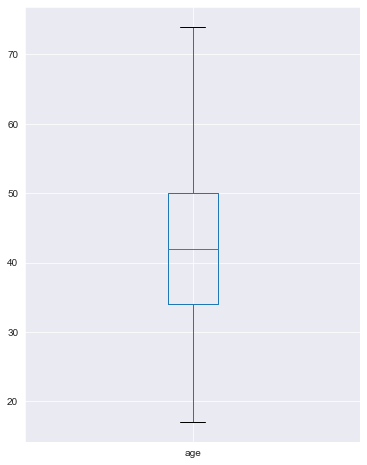

In [63]:
# people are working more than 40 hours per week
# 99 hours/week is probably a code in the data dictionary
df.boxplot(['age'], showfliers=False, figsize=(6,8));


In [64]:
df8.head(1)

,Unnamed: 0,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,50,Self-emp-not-inc,Bachelors,13,1,White,White,Male,0,0,13,United-States,<=85k


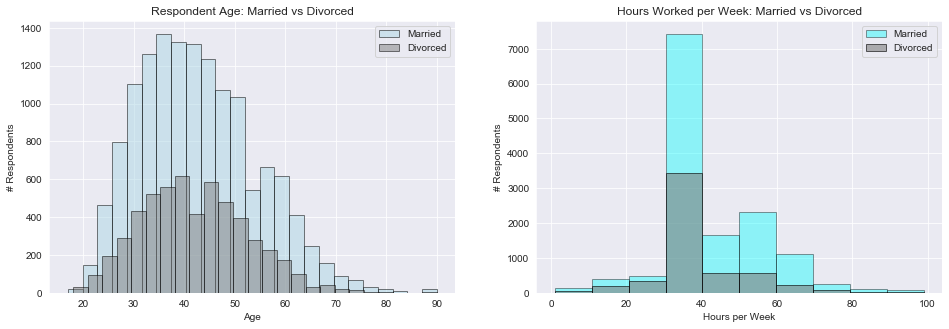

In [65]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig_cont = plt.figure(figsize = (16,5))
fig_cont.subplots_adjust(hspace = .30)

age1 = fig_cont.add_subplot(121)

age1.hist(df8[df8['marital_status'] == 1].age, bins = 25, label='Married', alpha = .50,edgecolor= 'black',color ='lightblue')
age1.hist(df8[df8['marital_status'] == 0].age, bins = 25, label='Divorced', alpha = .50,edgecolor= 'black',color ='grey')
age1.set_title('Respondent Age: Married vs Divorced')
age1.set_xlabel('Age')
age1.set_ylabel('# Respondents')
age1.legend(loc='upper right')

hours1 = fig_cont.add_subplot(122)

hours1.hist(df8[df8['marital_status'] == 1].hours_per_week, bins = 10, label='Married', alpha = .40,edgecolor= 'black',color ='cyan')
hours1.hist(df8[df8['marital_status'] == 0].hours_per_week, bins = 10, label='Divorced', alpha = .60,edgecolor= 'black',color ='grey')
hours1.set_title('Hours Worked per Week: Married vs Divorced')
hours1.set_xlabel('Hours per Week')
hours1.set_ylabel('# Respondents')
hours1.legend(loc='upper right')

plt.show()

### Capital Gains

In [66]:
2048/19534


0.10484283812839153

Subset of 2048 out of 19534 total observations,
who have positive investment income.


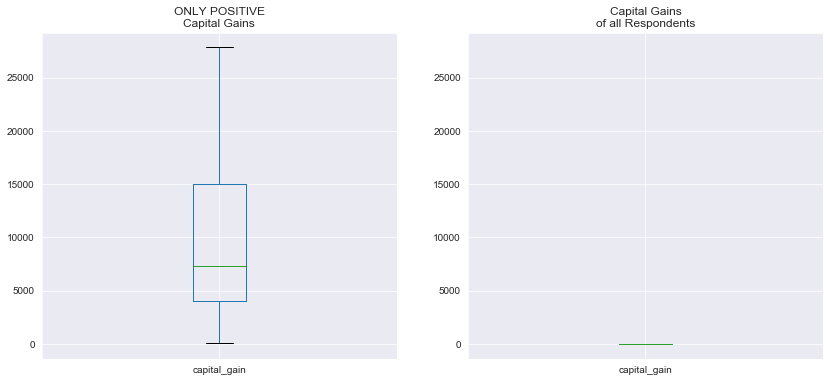

In [67]:
fig_capital = plt.figure(figsize=(14,6))

ax1 = fig_capital.add_subplot(121)
ax1 = df[df.capital_gain > 0].boxplot('capital_gain', showfliers=False)
ax1.set_title('ONLY POSITIVE\nCapital Gains')
print('Subset of {} out of {} total observations,\nwho have positive investment income.'.format(df[df.capital_gain > 0].count()[0], len(df)))

ax2 = fig_capital.add_subplot(122, sharey=ax1)
ax2 = df.boxplot('capital_gain', showfliers=False)
ax2.set_title('Capital Gains\nof all Respondents');

### Capital Loss

Subset of 1105 out of 19534 total observations,
who have lost money on investments.


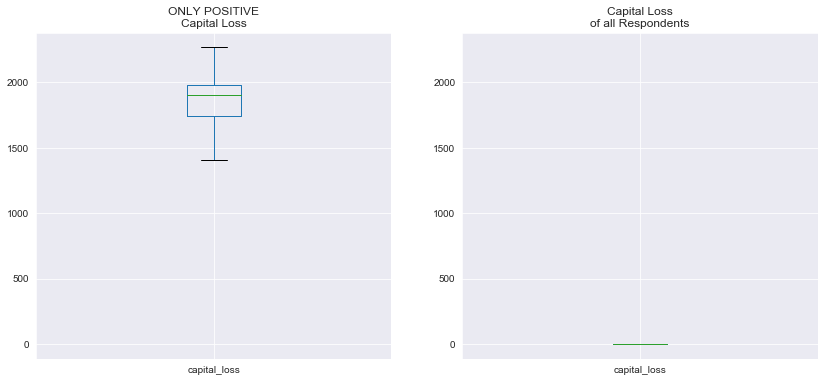

In [68]:
fig_capital_loss = plt.figure(figsize=(14,6))

ax1 = fig_capital_loss.add_subplot(121)
ax1 = df[df.capital_loss > 0].boxplot('capital_loss', showfliers=False)
ax1.set_title('ONLY POSITIVE\nCapital Loss')
print('Subset of {} out of {} total observations,\nwho have lost money on investments.'.format(df[df.capital_loss > 0].count()[0], len(df)))

ax2 = fig_capital_loss.add_subplot(122, sharey=ax1)
ax2 = df.boxplot('capital_loss', showfliers=False)
ax2.set_title('Capital Loss\nof all Respondents');

## Move engineered df to csv to transport to modeling notebook

In [69]:
df8.drop('workclass', axis=1, inplace=True)

In [72]:
df8.drop('Unnamed: 0', axis=1, inplace=True)

In [74]:
df8.to_csv('marriage_eng.csv')